<a href="https://colab.research.google.com/github/skywalker290/Image-Classification-Model/blob/main/CNN_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow.keras


In [2]:
(x_train,y_train),(x_test,y_test)=keras .datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [4]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [5]:
class_labels=['T-shirt/top','Trouser','Pullover','Dress','coat','sandal','shirt','sneakers','bag','ankle boot']

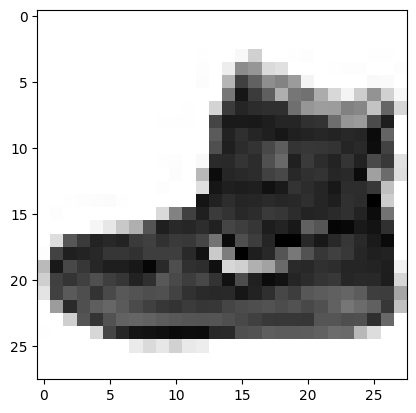

In [6]:
plt.imshow(x_train[0],cmap='Greys')

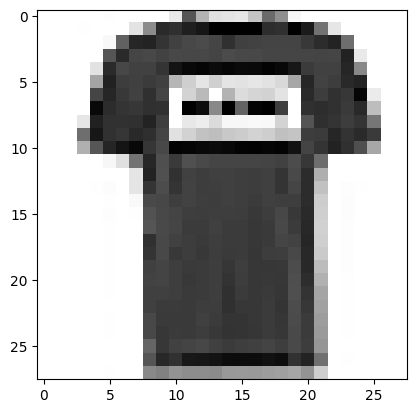

In [7]:
plt.imshow(x_train[1],cmap='Greys')

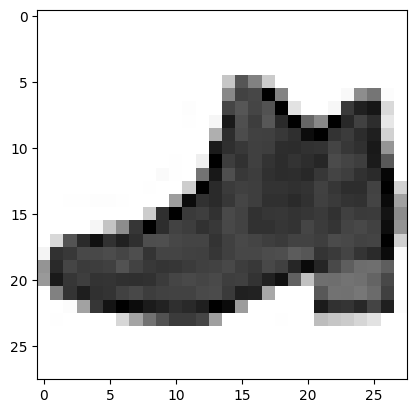

In [8]:
plt.imshow(x_train[15],cmap='Greys')

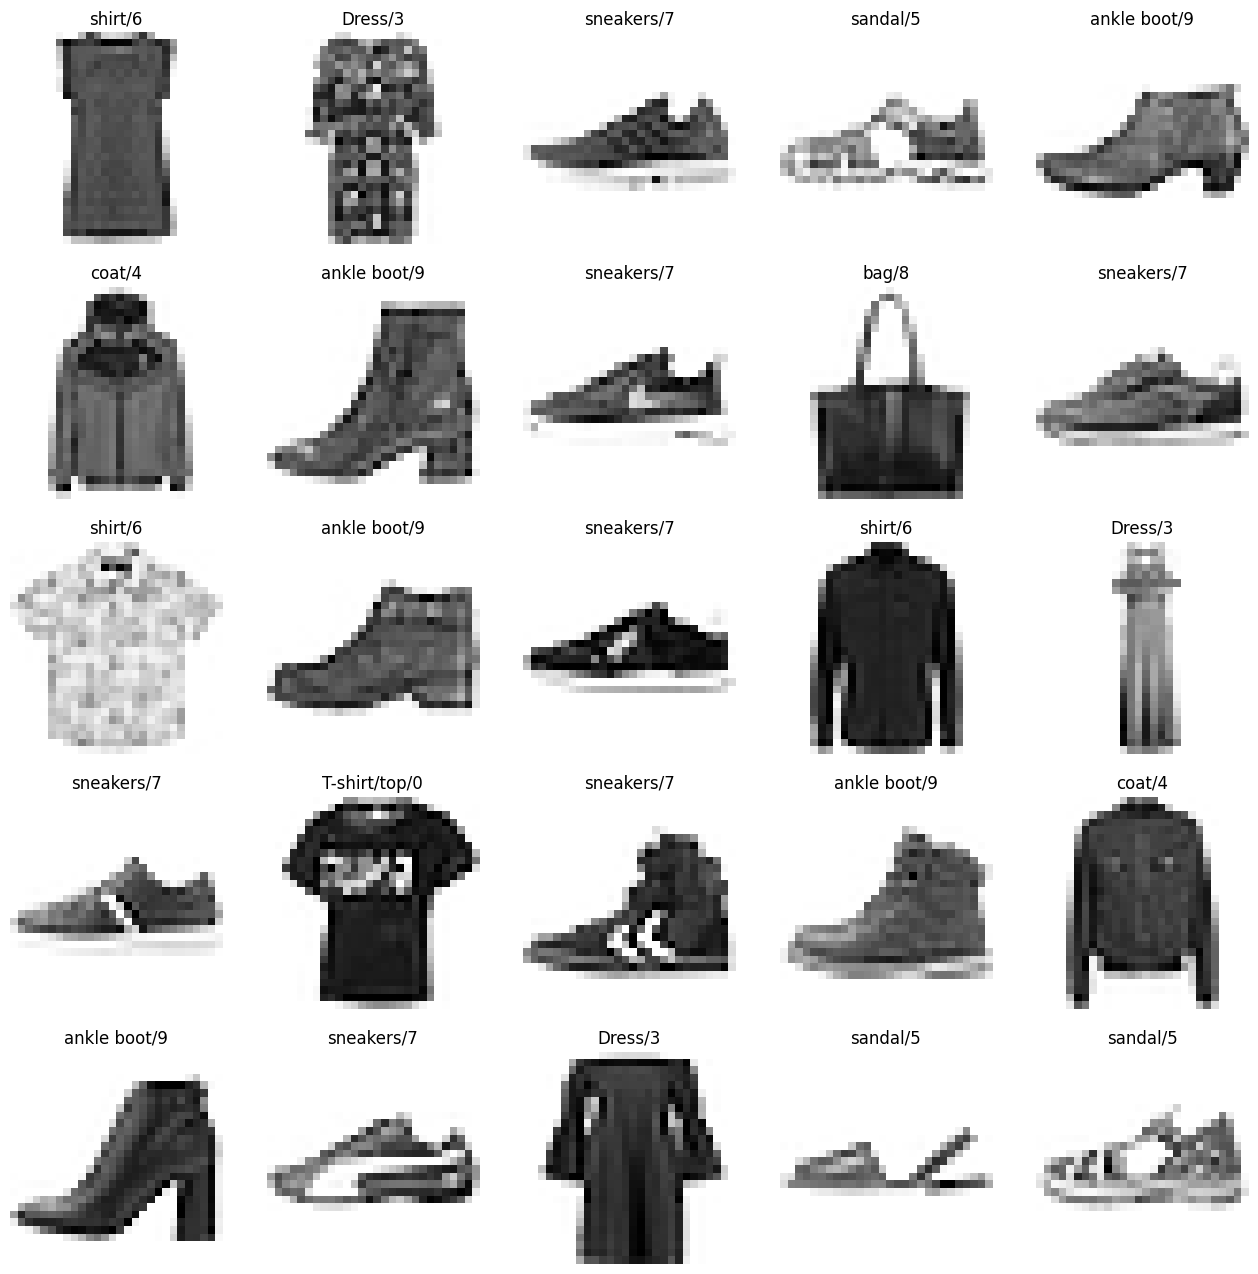

In [9]:
plt.figure(figsize=(16,16))
j=1

for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(x_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{}/{}'.format(class_labels[y_train[i]],y_train[i]))

In [10]:
x_train.ndim
y_train.shape

(60000,)

[9 0 3 2 7 5 1 6 4 8]
[0, 1, 3, 5, 6, 8, 16, 18, 19, 23]
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)


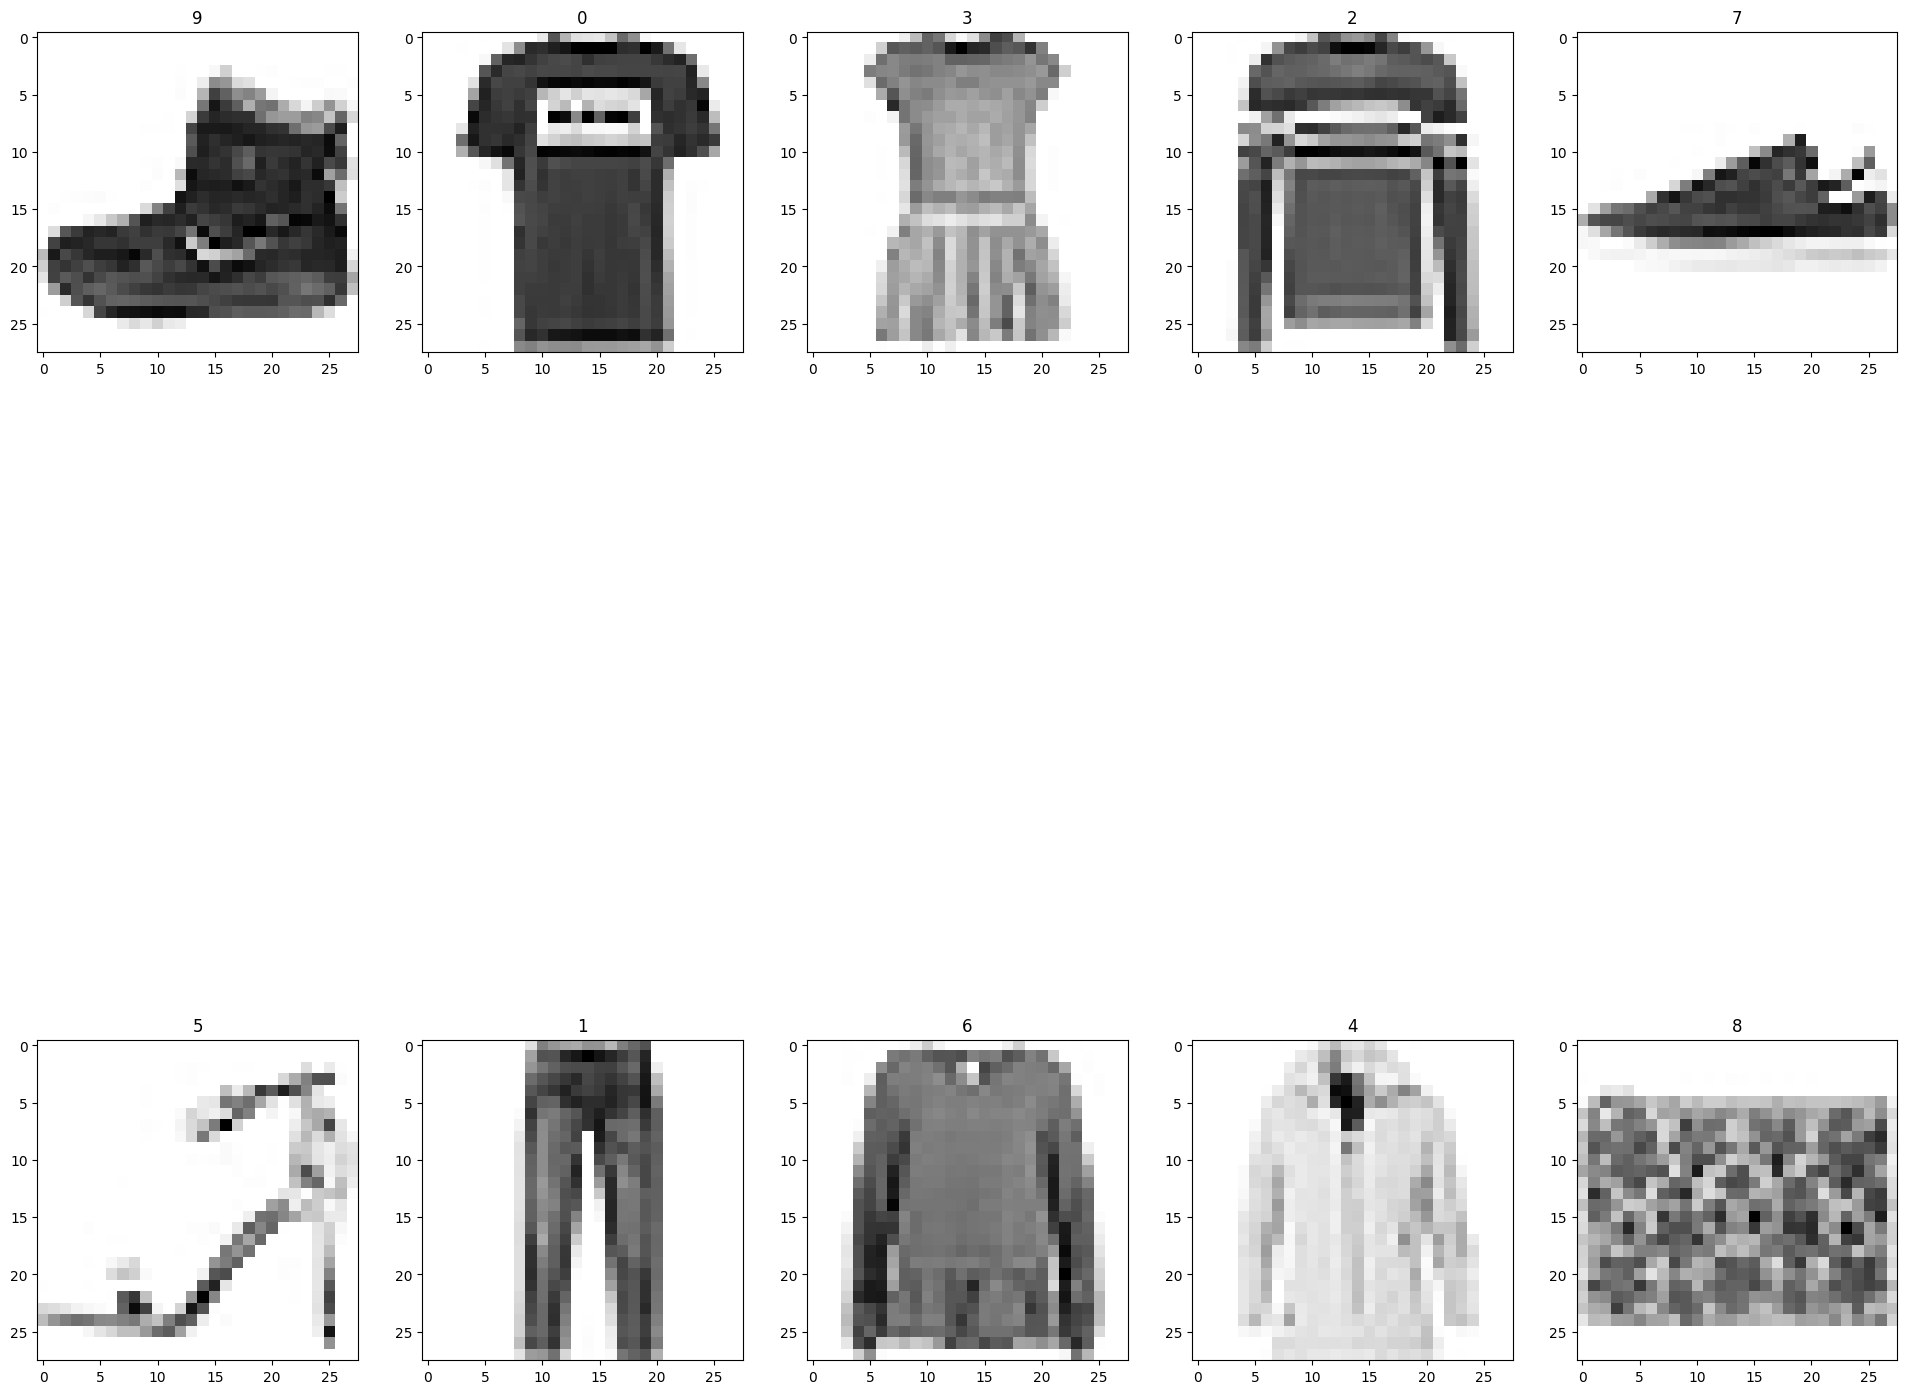

In [11]:
fashionMNIST=keras.datasets.fashion_mnist
(x_train,y_train), (x_test,y_test)= fashionMNIST.load_data()
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)
eil = np.array(pd.unique(y_train))
eindex1=[]
print(eil)

for i in eil:
  eindex1.append(list(y_train).index(i))
print(eindex1)

plt.figure(figsize=(24,24))
for x,y in enumerate(eindex1):
  print(x_train[y].shape)
  plt.subplot(2,5,x+1)
  plt.imshow(tensorflow.squeeze(x_train[y]),cmap='Greys')
  plt.title('{}'.format(eil[x]))

In [12]:
x_train.ndim

4

In [13]:
x_train.shape,y_train.shape

((60000, 28, 28, 1), (60000,))

In [14]:
# x_train =np.expand_dims(x_train,-1)
# x_test= np.expand_dims(x_test,-1)

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)


Feature scalling

In [15]:
x_train = x_train/255;
x_test = x_test/255;

In [16]:
x_train.shape,y_train.shape

((60000, 28, 28, 1, 1), (60000,))

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [18]:
x_train.shape,y_train.shape

((48000, 28, 28, 1, 1), (48000,))

In [19]:
x_val.shape,y_val.shape

((12000, 28, 28, 1, 1), (12000,))

In [20]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding='same', activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2, 2), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(units=10, activation='softmax')
])


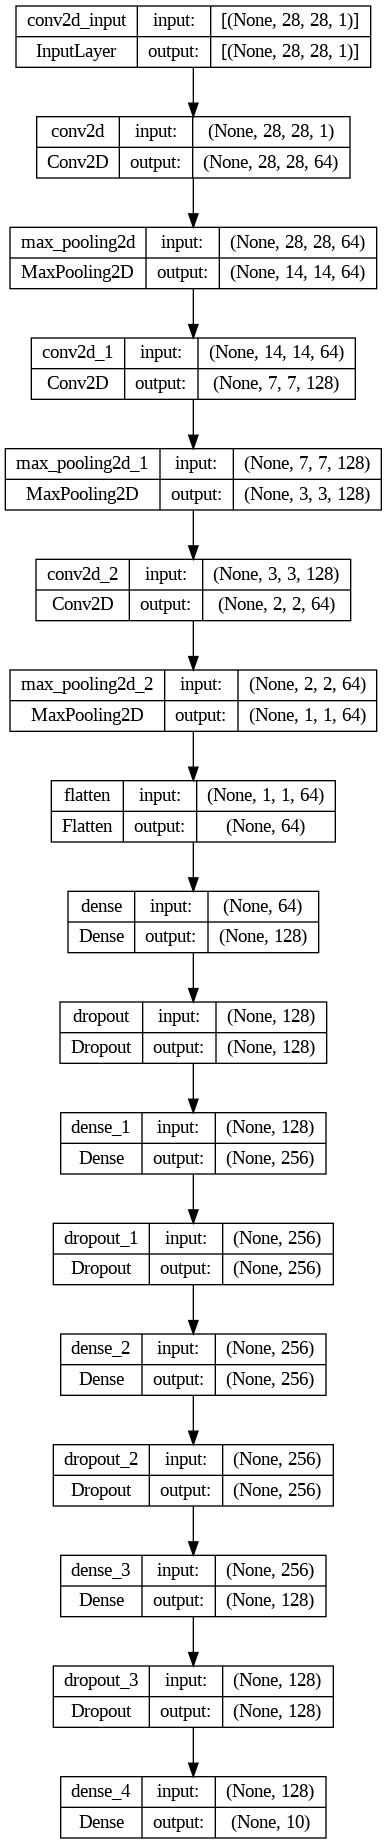

In [21]:
model.save('CNN.h5')  # Replace with your desired filename
keras.utils.plot_model(model,to_file='modelplot.png',show_shapes=True, show_layer_names =True)

In [22]:
  model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 64)          73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [23]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.fit(x_train,y_train,epochs=20,batch_size=512, verbose=1,validation_data=(x_val,y_val))

Epoch 1/20
94/94 [==============================] - 85s 873ms/step - loss: 1.1844 - accuracy: 0.5231 - val_loss: 0.6005 - val_accuracy: 0.7608
Epoch 2/20
94/94 [==============================] - 87s 932ms/step - loss: 0.5849 - accuracy: 0.7699 - val_loss: 0.4677 - val_accuracy: 0.8199
Epoch 3/20
94/94 [==============================] - 83s 874ms/step - loss: 0.4679 - accuracy: 0.8284 - val_loss: 0.3937 - val_accuracy: 0.8518
Epoch 4/20
94/94 [==============================] - 86s 907ms/step - loss: 0.3940 - accuracy: 0.8587 - val_loss: 0.3423 - val_accuracy: 0.8741
Epoch 5/20
94/94 [==============================] - 80s 854ms/step - loss: 0.3519 - accuracy: 0.8757 - val_loss: 0.3177 - val_accuracy: 0.8872
Epoch 6/20
94/94 [==============================] - 82s 872ms/step - loss: 0.3217 - accuracy: 0.8850 - val_loss: 0.3200 - val_accuracy: 0.8868
Epoch 7/20
94/94 [==============================] - 80s 856ms/step - loss: 0.3082 - accuracy: 0.8905 - val_loss: 0.2961 - val_accuracy: 0.8946

In [34]:
model.save('CNN.h5')  # Replace with your desired filename

In [25]:
model.predict(np.expand_dims(x_test[0],axis=0)).round(2)

1/1 [==============================] - 0s 146ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [26]:
np.argmax(model.predict(np.expand_dims(x_test[0],axis=0)).round(2))

1/1 [==============================] - 0s 27ms/step


9

In [27]:
y_test[0]

9

In [28]:
y_pred= model.predict(x_test).round(2)
y_pred

313/313 [==============================] - 4s 14ms/step


array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.4 , 0.  , 0.01]], dtype=float32)

In [29]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.2905 - accuracy: 0.9040


[0.2904936373233795, 0.9039999842643738]

<Axes: >

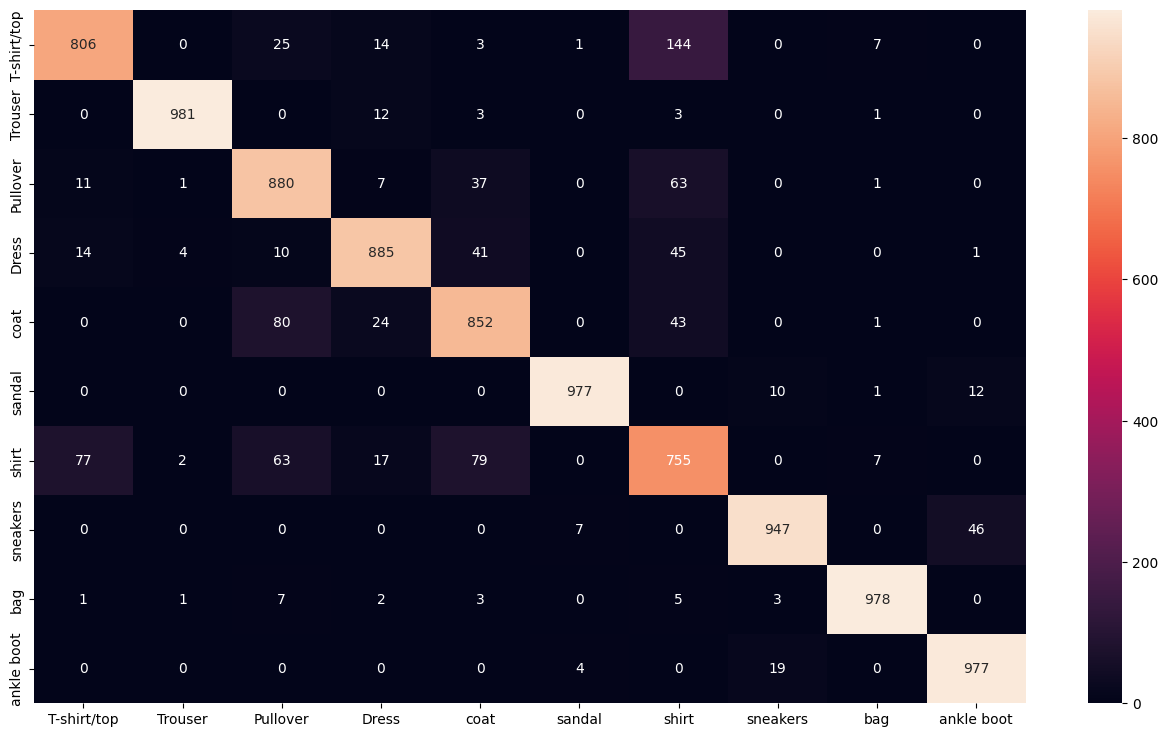

In [31]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))

y_pred_labels=[np.argmax(label) for label in y_pred ]
cm=confusion_matrix(y_test,y_pred_labels)
sns.heatmap(cm, annot= True, fmt= 'd', xticklabels=class_labels, yticklabels=class_labels)

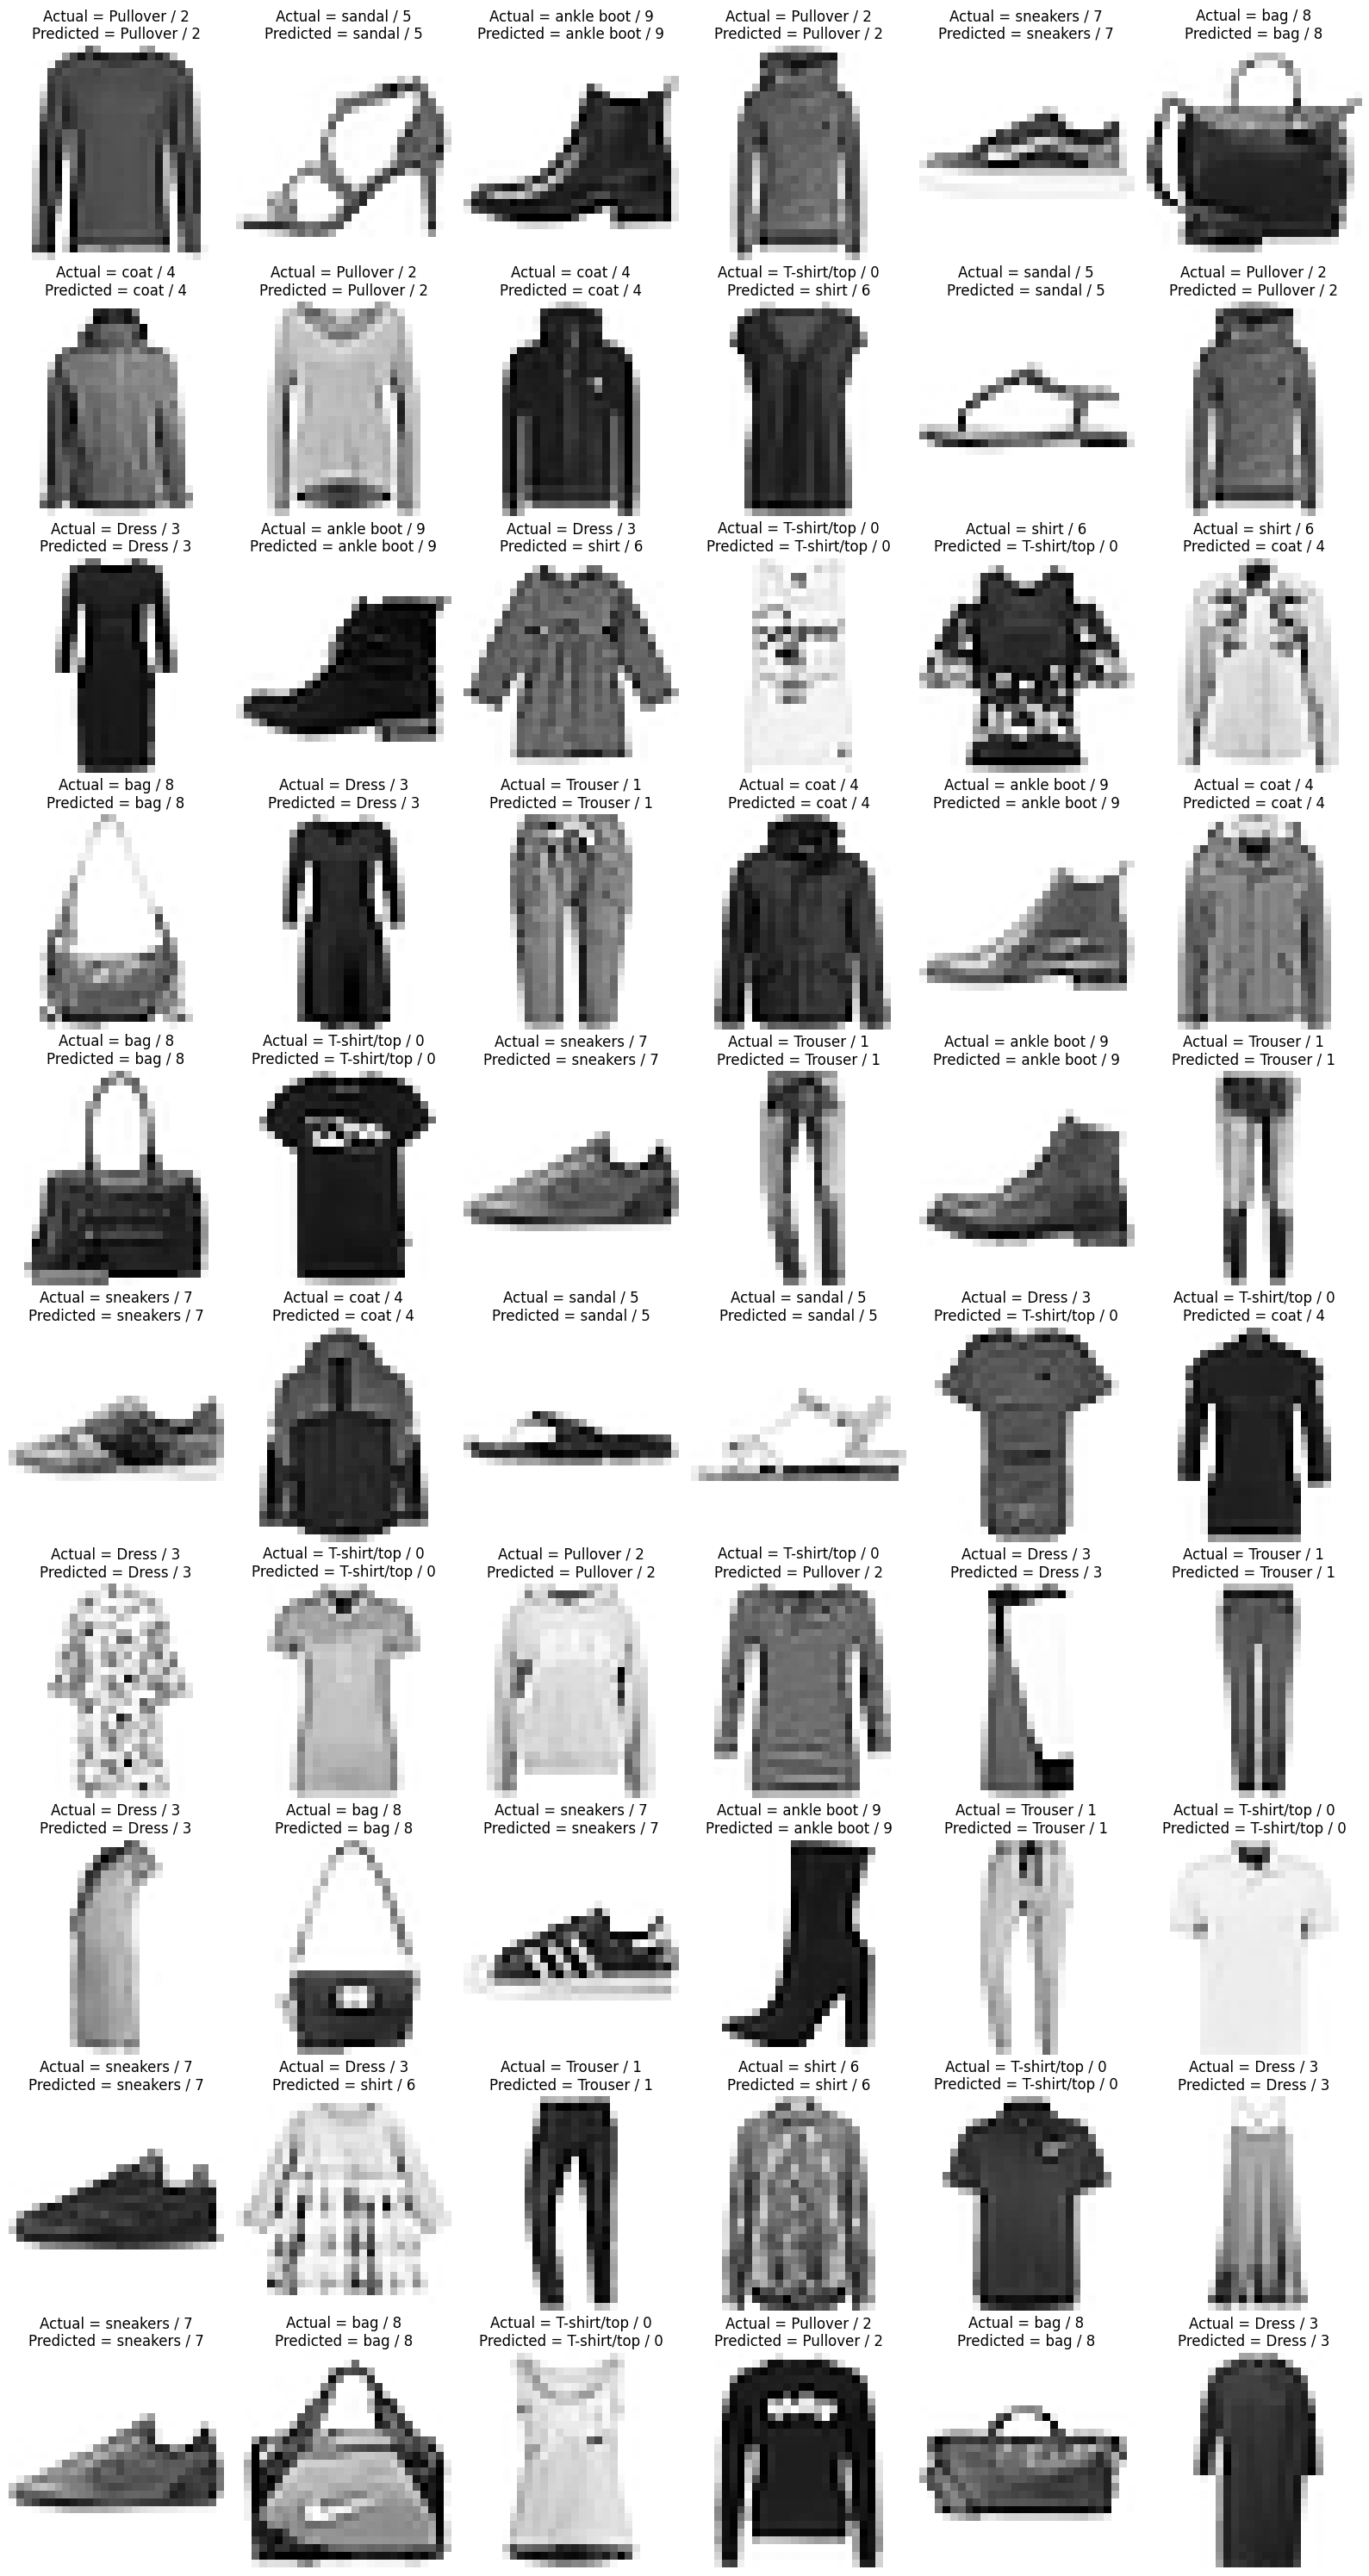

In [32]:
plt.figure(figsize=(16, 30))
j = 1

for i in np.random.randint(0, 1000, 60):
    plt.subplot(10, 6, j)
    j += 1  # Increment j within the loop
    plt.imshow(x_test[i].reshape(28, 28), cmap='Greys')
    plt.axis('off')
    true_label = class_labels[y_test[i]]
    predicted_label = class_labels[np.argmax(y_pred[i])]
    plt.title('Actual = {} / {}\nPredicted = {} / {}'.format(true_label, y_test[i], predicted_label, np.argmax(y_pred[i])))

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


In [36]:
from keras.models import load_model
model1 = load_model('CNN.h5')

In [37]:
predictions = loaded_model.predict(x_test)


313/313 [==============================] - 5s 17ms/step


In [39]:
y_load=model1.predict(x_test).round(2)

model1.evaluate(x_test,y_test)


313/313 [==============================] - 4s 13ms/step - loss: 0.2905 - accuracy: 0.9040


[0.2904936373233795, 0.9039999842643738]

<Axes: >

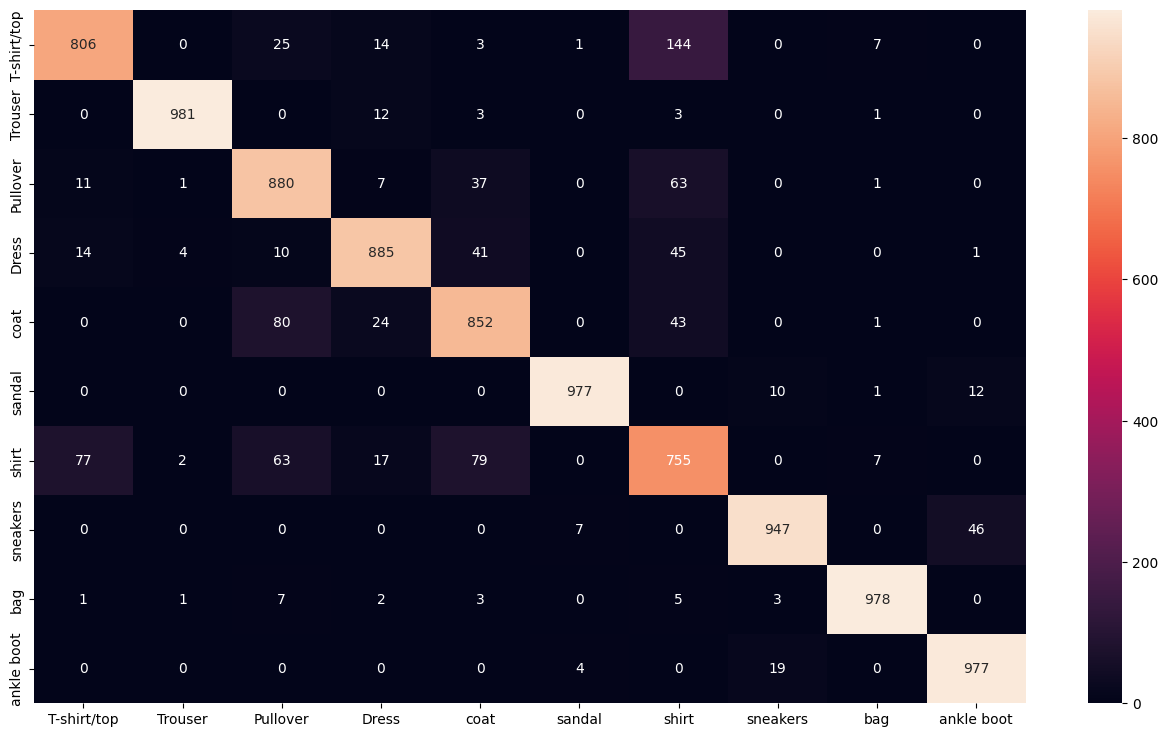

In [40]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))

y_pred_labels=[np.argmax(label) for label in y_pred ]
cm=confusion_matrix(y_test,y_pred_labels)
sns.heatmap(cm, annot= True, fmt= 'd', xticklabels=class_labels, yticklabels=class_labels)